# 🙉 Monkey-patching

In [ ]:
#| default_exp patch

In [ ]:
# |hide
from nbdev.showdoc import *

In [ ]:
#| hide
#| export
import torch
from fastcore.foundation import patch_to
import matplotlib.pyplot as plt

from lovely_tensors.repr_str import StrProxy
from lovely_tensors.repr_rgb import RGBProxy
from lovely_tensors.repr_plt import PlotProxy
from lovely_tensors.repr_chans import ChanProxy

In [ ]:
# |export
def monkey_patch(cls=torch.Tensor):
    "Monkey-patch lovely features into `cls`" 

    if not hasattr(cls, '_plain_repr'):
        cls._plain_repr = cls.__repr__
        cls._plain_str = cls.__str__

    @patch_to(cls)
    def __repr__(self: torch.Tensor, *, tensor_contents=None):        
        return str(StrProxy(self))

    # Plain - the old behavior
    @patch_to(cls, as_prop=True)
    def p(self: torch.Tensor, *, tensor_contents=None):
        return StrProxy(self, plain=True)

    # Verbose - print both stats and plain values
    @patch_to(cls, as_prop=True)
    def v(self: torch.Tensor, *, tensor_contents=None):
        return StrProxy(self, verbose=True)

    # .deeper and .deeper(...)
    @patch_to(cls, as_prop=True)
    def deeper(self: torch.Tensor):
        return StrProxy(self, depth=1)

    # .rgb and .rgb(...)
    @patch_to(cls, as_prop=True)
    def rgb(t: torch.Tensor):
        return RGBProxy(t)
    
    # .chans and .chans(...)
    @patch_to(cls, as_prop=True)
    def chans(t: torch.Tensor):
        return ChanProxy(t)

    # .plt and .plt(...)
    @patch_to(cls, as_prop=True)
    def plt(t: torch.Tensor):
        return PlotProxy(t)

In [ ]:
monkey_patch()

In [ ]:
image = torch.load("mysteryman.pt")

In [ ]:
spicy = image.flatten()[:12].clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
spicy

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +Inf! -Inf! NaN!

In [ ]:
spicy.v

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +Inf! -Inf! NaN!
tensor([[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan,
         -4.0543e-01],
        [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01,
         -5.0818e-01]])

In [ ]:
spicy.p

tensor([[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan,
         -4.0543e-01],
        [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01,
         -5.0818e-01]])

In [ ]:
image.deeper

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
image[:3,:3,:5].deeper(depth=2)

tensor[3, 3, 5] n=45 x∈[-1.316, -0.197] μ=-0.593 σ=0.306
  tensor[3, 5] n=15 x∈[-0.765, -0.337] μ=-0.492 σ=0.124
    tensor[5] x∈[-0.440, -0.337] μ=-0.385 σ=0.041 [-0.354, -0.337, -0.405, -0.440, -0.388]
    tensor[5] x∈[-0.662, -0.405] μ=-0.512 σ=0.108 [-0.405, -0.423, -0.491, -0.577, -0.662]
    tensor[5] x∈[-0.765, -0.474] μ=-0.580 σ=0.125 [-0.474, -0.474, -0.542, -0.645, -0.765]
  tensor[3, 5] n=15 x∈[-0.513, -0.197] μ=-0.321 σ=0.099
    tensor[5] x∈[-0.303, -0.197] μ=-0.243 σ=0.055 [-0.197, -0.197, -0.303, -0.303, -0.215]
    tensor[5] x∈[-0.408, -0.232] μ=-0.327 σ=0.084 [-0.250, -0.232, -0.338, -0.408, -0.408]
    tensor[5] x∈[-0.513, -0.285] μ=-0.394 σ=0.102 [-0.303, -0.285, -0.390, -0.478, -0.513]
  tensor[3, 5] n=15 x∈[-1.316, -0.672] μ=-0.964 σ=0.176
    tensor[5] x∈[-0.985, -0.672] μ=-0.846 σ=0.123 [-0.672, -0.985, -0.881, -0.776, -0.916]
    tensor[5] x∈[-1.212, -0.724] μ=-0.989 σ=0.179 [-0.724, -1.072, -0.968, -0.968, -1.212]
    tensor[5] x∈[-1.316, -0.828] μ=-1.058 σ=0.1

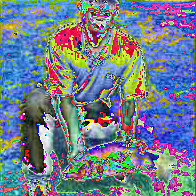

In [ ]:
image.rgb

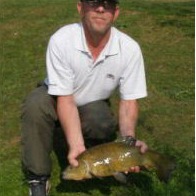

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std
image.rgb(in_stats)

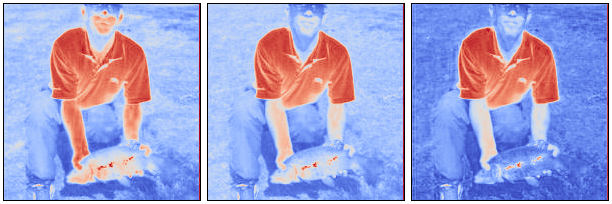

In [ ]:
mean = torch.tensor(in_stats[0])[:,None,None]
std = torch.tensor(in_stats[1])[:,None,None]

(image*std + mean).chans # all pixels in [0, 1] range

In [ ]:
(image*0.3+0.5) # Slightly outside of [0, 1] range

tensor[3, 196, 196] n=115248 x∈[-0.135, 1.292] μ=0.384 σ=0.322

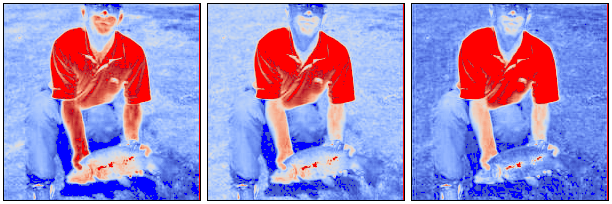

In [ ]:
(image*0.3+0.5).chans # shows clipping (bright blue/red)

In [ ]:
# |hide 
torch.manual_seed(1) # For consistency fo plots

<torch._C.Generator>

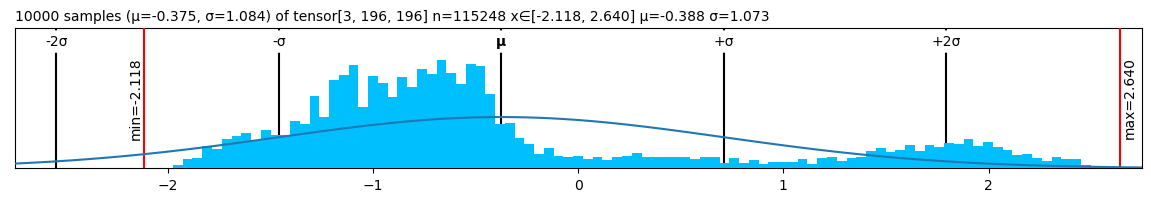

In [ ]:
image.plt

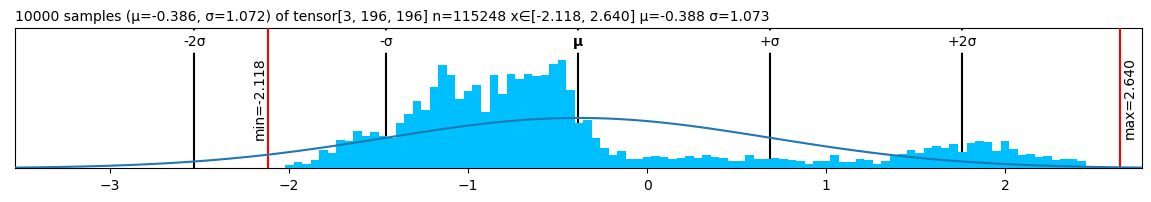

In [ ]:
image.plt(center="mean")

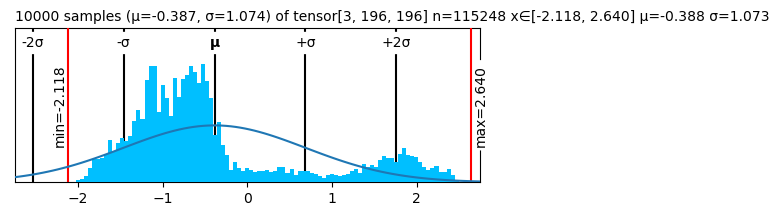

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
plt.close(fig)
image.plt(ax=ax)
fig

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()